In [1]:
import pandas as pd
from PIL import ImageTk, Image, ImageDraw
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
image = Image.open('Belka.jpg')  # Открываем изображение
draw = ImageDraw.Draw(image)  # Создаем инструмент для рисования
width = image.size[0]  # Определяем ширину
height = image.size[1]  # Определяем высоту
pix = image.load() # Выгружаем значения пикселей

In [3]:
image_block = {}
df = pd.DataFrame(image_block) #таблица пикселей
R = [] #список из краных цветов пикселя
G = [] #зеленых
B = [] #синих

In [4]:
for x in range(width):
    for y in range(height):
       r = pix[x, y][0] #узнаём значение красного цвета пикселя
       g = pix[x, y][1] #зелёного
       b = pix[x, y][2] #синего
       R.append(r) #значений красных цветов
       G.append(g) #зеленых
       B.append(b) #синих

In [5]:
df.insert(0,'R', R) #создание столбца R
df.insert(1,'G', G) #столбца G
df.insert(2,'B', B) #столбца B
print(df)

          R    G   B
0       144  120  84
1       142  118  80
2       147  124  83
3       148  126  85
4       154  135  93
...     ...  ...  ..
522235   94   26   5
522236  104   36  15
522237  102   31  11
522238   98   28   3
522239   99   29   3

[522240 rows x 3 columns]


In [6]:
tf = df.copy(deep=True) #делаем копию с которой будем работать

In [7]:
df

,R,G,B
0,144,120,84
1,142,118,80
2,147,124,83
3,148,126,85
4,154,135,93
...,...,...,...
522235,94,26,5
522236,104,36,15
522237,102,31,11
522238,98,28,3


In [8]:
tf

,R,G,B
0,144,120,84
1,142,118,80
2,147,124,83
3,148,126,85
4,154,135,93
...,...,...,...
522235,94,26,5
522236,104,36,15
522237,102,31,11
522238,98,28,3


In [9]:
X = tf.values[:,1:] #возвращаем список всех значений
X = np.nan_to_num(X) #создаем массив
Clus_dataSet = StandardScaler().fit_transform(X) #данные из таблицы
print(Clus_dataSet)
print()
print(X)

[[ 0.25736206  0.59782211]
 [ 0.20931196  0.49057276]
 [ 0.35346224  0.57100977]
 ...
 [-1.8808671  -1.35947857]
 [-1.95294224 -1.57397727]
 [-1.9289172  -1.57397727]]

[[120  84]
 [118  80]
 [124  83]
 ...
 [ 31  11]
 [ 28   3]
 [ 29   3]]


In [10]:
cluster_num = 4 #задаем колво кластеров
k_means = KMeans(init = 'k-means++', n_clusters = cluster_num, n_init = 12) #создаем переменную k-means с помощью конструктора
k_means.fit(X) #передаем массив Х 
labels = k_means.labels_ #создаем матрицу
print(labels)

[1 1 1 ... 0 0 0]


In [11]:
tf['Clus_km'] = labels #создание новой колонки с кластерами
print(tf)

          R    G   B  Clus_km
0       144  120  84        1
1       142  118  80        1
2       147  124  83        1
3       148  126  85        1
4       154  135  93        1
...     ...  ...  ..      ...
522235   94   26   5        0
522236  104   36  15        0
522237  102   31  11        0
522238   98   28   3        0
522239   99   29   3        0

[522240 rows x 4 columns]


In [12]:
tf.groupby('Clus_km').mean() #среднии значения всех кластеров

,R,G,B
Clus_km,,,
0,105.621459,49.133721,13.383564
1,169.499838,135.392786,77.445793
2,134.642966,96.232505,50.979583
3,209.753138,168.927332,125.955522


In [13]:
import warnings
warnings.filterwarnings('ignore') #блокируем мешающие исключения-предупреждения

In [14]:
for i in range(cluster_num): #записываем среднии значения кластеров во все переменные
    RR, GG, BB, C_km = tf[tf.Clus_km == i].mean()
    block_time = tf.loc[tf.Clus_km == i]
    block_time.ix[:,[0, 1, 2]] = int(RR), int(GG), int(BB)
    tf.loc[block_time.index, block_time.columns] = block_time
    print(str(C_km) + ': ', int(RR), int(GG), int(BB))
    print()
    print(tf[tf.Clus_km == i])
    print()

0.0:  105 49 13

          R   G   B  Clus_km
21      105  49  13        0
22      105  49  13        0
25      105  49  13        0
26      105  49  13        0
30      105  49  13        0
...     ...  ..  ..      ...
522235  105  49  13        0
522236  105  49  13        0
522237  105  49  13        0
522238  105  49  13        0
522239  105  49  13        0

[96761 rows x 4 columns]

1.0:  169 135 77

          R    G   B  Clus_km
0       169  135  77        1
1       169  135  77        1
2       169  135  77        1
3       169  135  77        1
4       169  135  77        1
...     ...  ...  ..      ...
522222  169  135  77        1
522223  169  135  77        1
522224  169  135  77        1
522225  169  135  77        1
522226  169  135  77        1

[179128 rows x 4 columns]

2.0:  134 96 50

          R   G   B  Clus_km
17      134  96  50        2
18      134  96  50        2
19      134  96  50        2
20      134  96  50        2
23      134  96  50        2
...     ...

In [15]:
tf

,R,G,B,Clus_km
0,169,135,77,1
1,169,135,77,1
2,169,135,77,1
3,169,135,77,1
4,169,135,77,1
...,...,...,...,...
522235,105,49,13,0
522236,105,49,13,0
522237,105,49,13,0
522238,105,49,13,0


In [16]:
j = 0
for x in range(width): #рисуем изображение с уже новыми значениями
    for y in range(height):
        rr = tf['R'][j]
        gg = tf['G'][j]
        bb = tf['B'][j]
        j += 1
        draw.point((x, y), (int(rr), int(gg), int(bb)))

image.save("result.jpg", "JPEG") #не забываем сохранить изображение
img = Image.open('result.jpg') #заносим результат в переменную

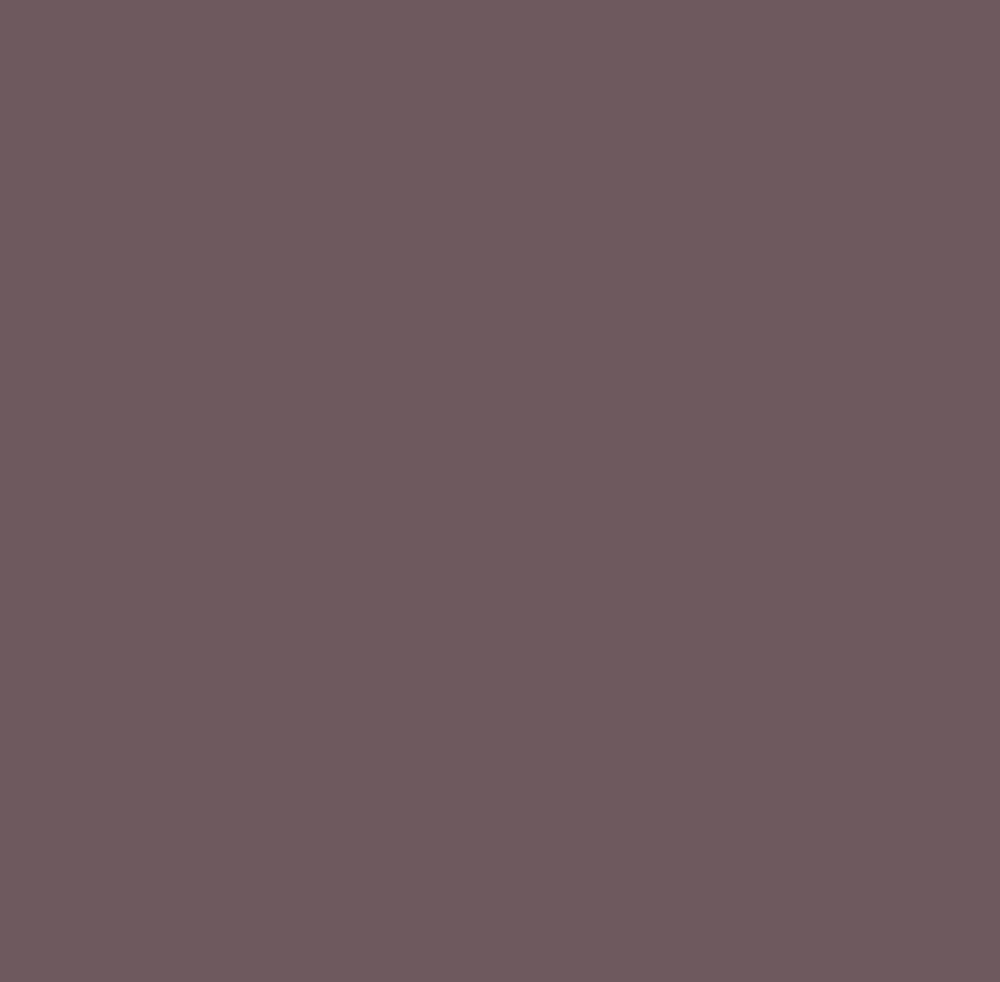

In [32]:
img #1

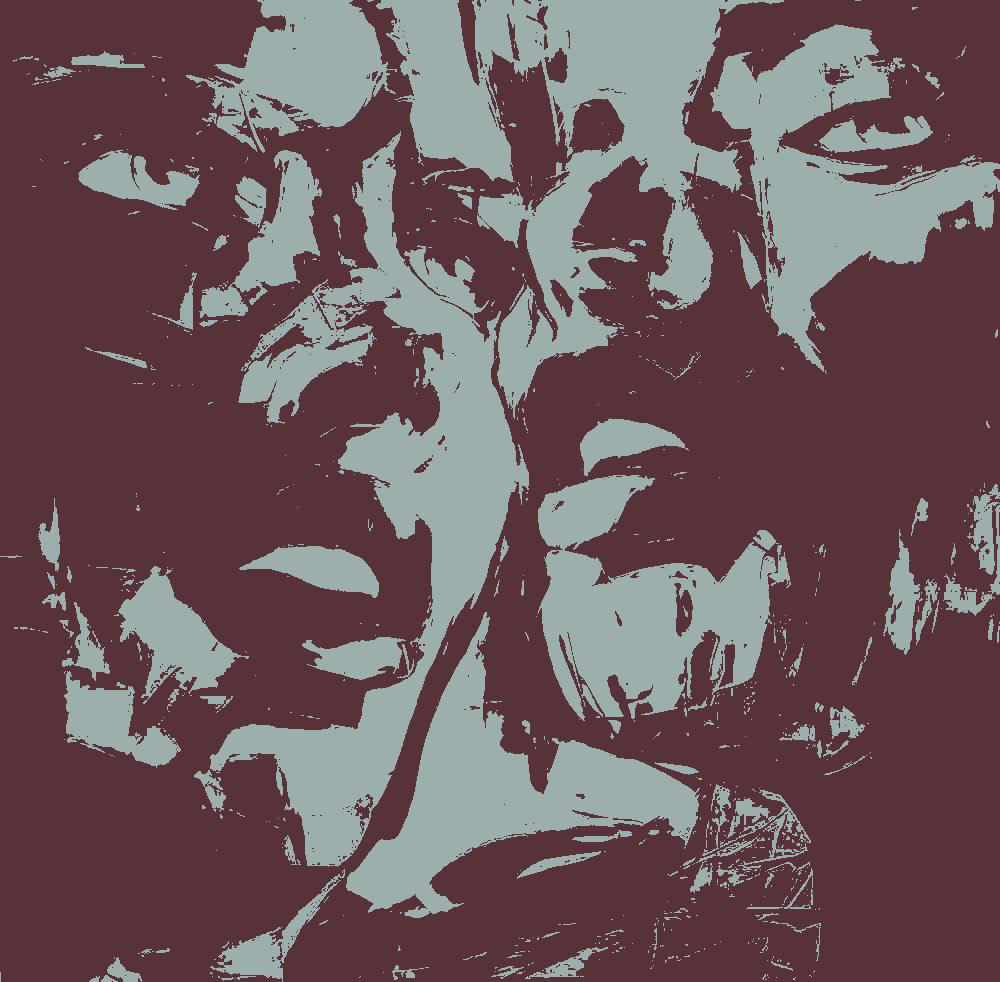

In [20]:
img #2

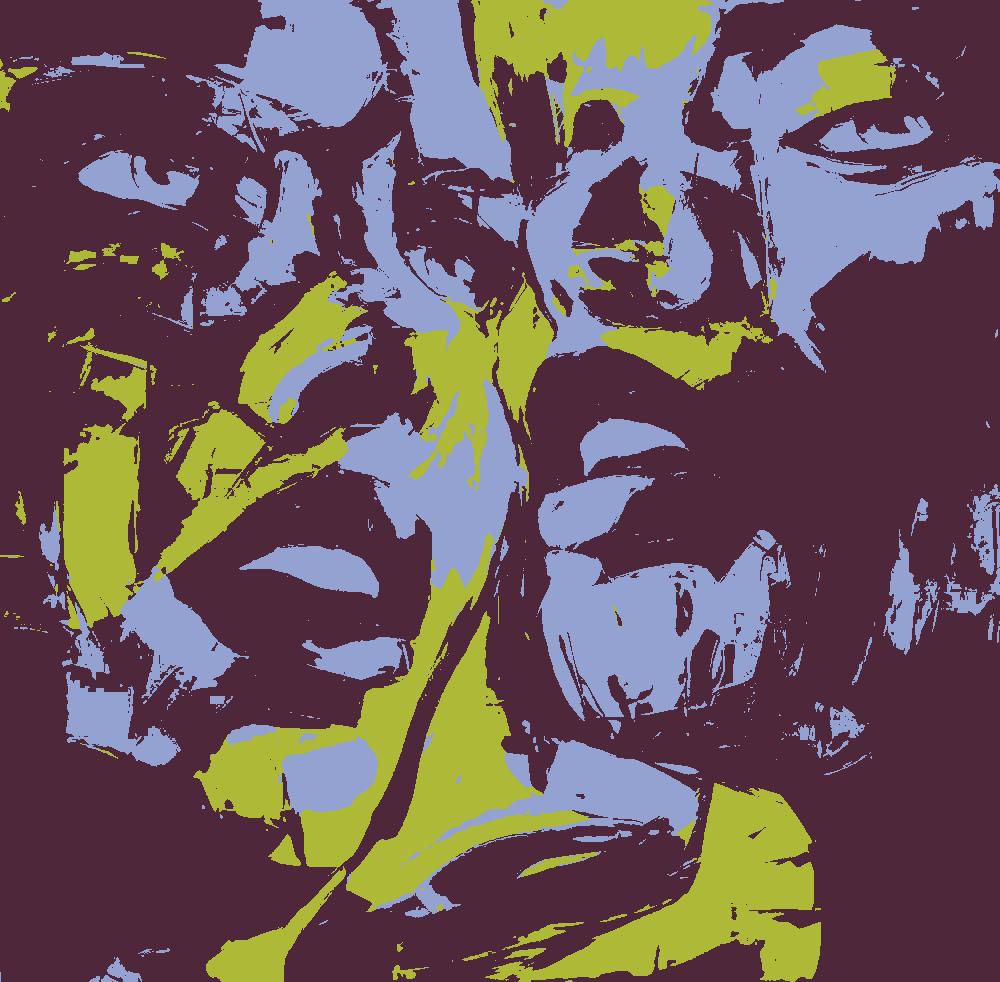

In [18]:
img #3

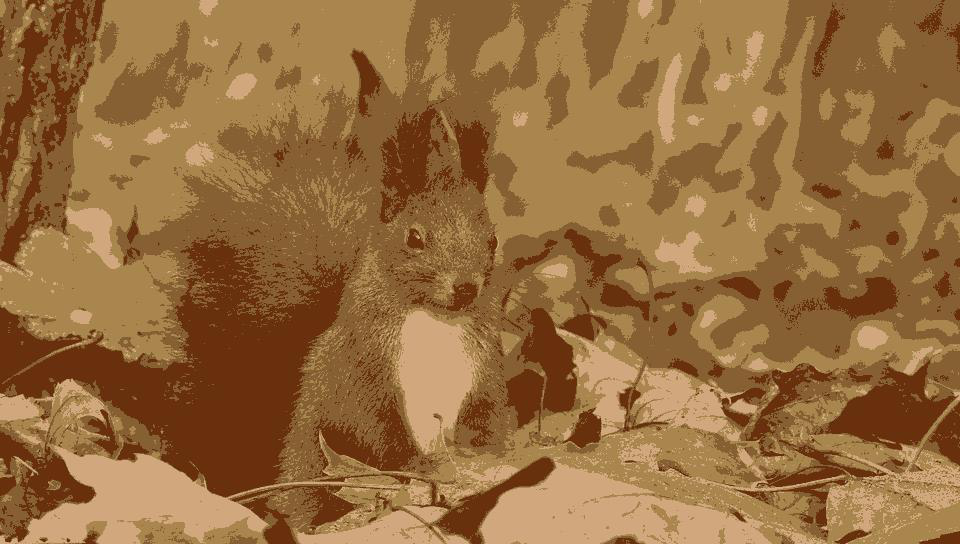

In [18]:
img #4

1


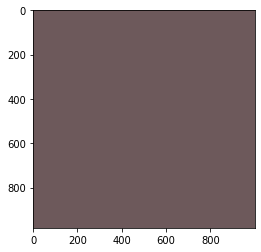

2


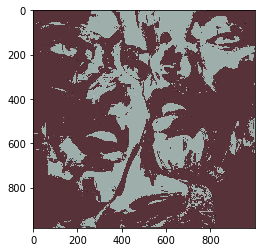

3


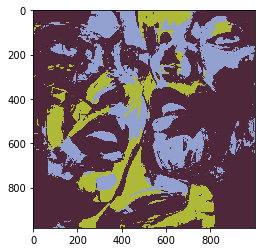

4


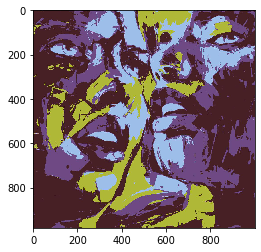

In [20]:
ClusterNum = 15
for cluster_num in range(1, ClusterNum+1):
    
    tf = df.copy(deep=True)

    k_means = KMeans(init = 'k-means++', n_clusters = cluster_num, n_init = 12)
    k_means.fit(X)
    label = k_means.labels_

    tf['Clus_km'] = label

    for i in range(cluster_num):
        RR, GG, BB, C_km = tf[tf.Clus_km == i].mean()
        block_time = tf.loc[tf.Clus_km == i]
        block_time.ix[:,[0, 1, 2]] = int(RR), int(GG), int(BB)
        tf.loc[block_time.index, block_time.columns] = block_time

    j = 0
    for x in range(width):
        for y in range(height):
            rr = tf['R'][j]
            gg = tf['G'][j]
            bb = tf['B'][j]
            j += 1
            draw.point((x, y), (int(rr), int(gg), int(bb)))

    image.save("result.jpg", "JPEG")

    img = Image.open('result.jpg')

    print(cluster_num)
    plt.imshow(img)
    plt.show()